# Dow Jones YTD (year to date) Perforemane:
# exploratory data analysis with new visualization map

## by Ori Rosenthal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib as u
from bs4 import BeautifulSoup as bs
from iexfinance import get_historical_data
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dj_url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
df = pd.read_html(dj_url, header=0)[1]
df.index = df.index +1
df = df[['Symbol', 'Company']]
df.head()

,Symbol,Company
1,MMM,3M
2,AXP,American Express
3,AAPL,Apple
4,BA,Boeing
5,CAT,Caterpillar


In [3]:
mydict = dict(zip(df.Symbol, df.Company))

In [4]:
mydict

{'AAPL': 'Apple',
 'AXP': 'American Express',
 'BA': 'Boeing',
 'CAT': 'Caterpillar',
 'CSCO': 'Cisco Systems',
 'CVX': 'Chevron',
 'DIS': 'Walt Disney',
 'DWDP': 'DowDuPont',
 'GS': 'Goldman Sachs',
 'HD': 'The Home Depot',
 'IBM': 'IBM',
 'INTC': 'Intel',
 'JNJ': 'Johnson & Johnson',
 'JPM': 'JPMorgan Chase',
 'KO': 'Coca-Cola',
 'MCD': "McDonald's",
 'MMM': '3M',
 'MRK': 'Merck & Company',
 'MSFT': 'Microsoft',
 'NKE': 'Nike',
 'PFE': 'Pfizer',
 'PG': 'Procter & Gamble',
 'TRV': 'Travelers',
 'UNH': 'UnitedHealth Group',
 'UTX': 'United Technologies',
 'V': 'Visa',
 'VZ': 'Verizon',
 'WBA': 'Walgreens Boots Alliance',
 'WMT': 'Walmart',
 'XOM': 'ExxonMobil'}

In [5]:
dj_list = df.Symbol.tolist()

In [6]:
def get_MktCap( symbol ):
    try:
        url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
        html = u.request.urlopen(url).read()
        soup = bs(html, 'lxml')
        mc =  soup.find(text = r'Market Cap')
        mc_ = mc.find_next(class_='snapshot-td2').text
        print( '{} Market Cap = {}'.format(symbol, mc_) )
        return mc_
    except Exception as e:
        print(e)
        
MrktCap = pd.Series(index=dj_list)
for sym in dj_list:
    MrktCap[sym] = get_MktCap(sym)

MMM Market Cap = 112.61B
AXP Market Cap = 84.80B
AAPL Market Cap = 774.92B
BA Market Cap = 197.43B
CAT Market Cap = 77.13B
CVX Market Cap = 216.18B
CSCO Market Cap = 194.90B
KO Market Cap = 198.16B
DWDP Market Cap = 127.12B
XOM Market Cap = 309.31B
GS Market Cap = 68.01B
HD Market Cap = 203.99B
IBM Market Cap = 109.97B
INTC Market Cap = 219.60B
JNJ Market Cap = 345.57B
JPM Market Cap = 338.96B
MCD Market Cap = 139.33B
MRK Market Cap = 200.74B
MSFT Market Cap = 794.04B
NKE Market Cap = 120.67B
PFE Market Cap = 252.83B
PG Market Cap = 226.99B
TRV Market Cap = 31.58B
UNH Market Cap = 238.18B
UTX Market Cap = 95.51B
VZ Market Cap = 235.96B
V Market Cap = 303.42B
WMT Market Cap = 275.39B
WBA Market Cap = 66.65B
DIS Market Cap = 167.88B


In [7]:
df['MarketCap'] = MrktCap.values

In [8]:
def get_Perf_YTD( symbol ):
    try:
        url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
        html = u.request.urlopen(url).read()
        soup = bs(html, 'lxml')
        mc =  soup.find(text = r'Perf YTD')
        mc_ = mc.find_next(class_='snapshot-td2').text
        return mc_
    except Exception as e:
        pass
        

In [9]:
df['YTD'] = df.Symbol.apply(get_Perf_YTD)

In [10]:
df

,Symbol,Company,MarketCap,YTD
1,MMM,3M,112.61B,0.92%
2,AXP,American Express,84.80B,3.68%
3,AAPL,Apple,774.92B,-2.81%
4,BA,Boeing,197.43B,6.61%
5,CAT,Caterpillar,77.13B,2.52%
6,CVX,Chevron,216.18B,4.12%
7,CSCO,Cisco Systems,194.90B,-0.02%
8,KO,Coca-Cola,198.16B,-1.65%
9,DWDP,DowDuPont,127.12B,4.00%
10,XOM,ExxonMobil,309.31B,6.20%


In [11]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import fix_yahoo_finance as yf

start = datetime(2018, 1, 1)
end = datetime.today()

df_list = []
 
#not all stocks will return data so set up an empty list to store the stock tickers that actually successfully returns data
used_stocks = []
 
#iterate over stock tickers in list and download relevant data
for stock in dj_list:
    dat = get_historical_data(stock, start=start, end=end, output_format='pandas')['close']
    dat.columns = [stock]
    df_list.append(dat)
    used_stocks.append(stock)
    

In [12]:
df1 = pd.concat(df_list,axis=1)

In [13]:
df1.columns = dj_list

In [14]:
df1 = df1.round(2)

In [15]:
df1.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DWDP,XOM,...,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,WBA,DIS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,229.55,97.12,169.71,291.13,153.60,122.84,37.42,44.02,70.26,81.65,...,35.18,87.56,128.96,218.22,125.34,50.58,113.75,96.30,73.19,110.05
2018-01-03,229.54,97.72,169.68,292.07,153.84,123.74,37.72,43.92,71.38,83.25,...,35.44,87.46,129.37,220.51,127.18,49.54,114.88,97.14,73.74,110.53
2018-01-04,232.54,99.35,170.47,290.96,155.95,123.35,37.83,44.54,72.75,83.37,...,35.52,88.08,129.37,221.46,127.58,49.70,115.31,97.23,69.92,110.48
2018-01-05,234.35,99.57,172.41,302.90,158.42,123.15,38.35,44.53,73.70,83.30,...,35.59,88.13,129.13,225.69,128.68,49.59,118.07,97.81,71.21,109.88
2018-01-08,233.59,98.66,171.77,304.18,162.40,123.76,38.75,44.46,73.44,83.67,...,35.19,88.60,128.44,221.77,129.90,49.50,118.55,99.25,72.12,108.30


In [16]:
drawdown_ytd_dict = dict()

for i in dj_list:
    drawdown_ytd_dict[i] = ((df1[i][-1]/max(df1[i])-1)*100).round(2)

In [17]:
drawdown_ytd_dict

{'AAPL': -33.71,
 'AXP': -12.1,
 'BA': -11.95,
 'CAT': -22.43,
 'CSCO': -10.57,
 'CVX': -11.95,
 'DIS': -4.5,
 'DWDP': -26.1,
 'GS': -34.74,
 'HD': -15.45,
 'IBM': -25.41,
 'INTC': -14.85,
 'JNJ': -12.79,
 'JPM': -14.09,
 'KO': -7.6,
 'MCD': -4.36,
 'MMM': -23.68,
 'MRK': -4.29,
 'MSFT': -9.42,
 'NKE': -10.21,
 'PFE': -6.25,
 'PG': -5.89,
 'TRV': -19.02,
 'UNH': -14.91,
 'UTX': -22.62,
 'V': -8.05,
 'VZ': -4.95,
 'WBA': -15.71,
 'WMT': -11.33,
 'XOM': -15.53}

In [18]:
df_test = df.copy()

In [19]:
df_test.head()

,Symbol,Company,MarketCap,YTD
1,MMM,3M,112.61B,0.92%
2,AXP,American Express,84.80B,3.68%
3,AAPL,Apple,774.92B,-2.81%
4,BA,Boeing,197.43B,6.61%
5,CAT,Caterpillar,77.13B,2.52%


In [20]:
df_test.set_index('Symbol', inplace=True)

In [21]:
df_test.head()

,Company,MarketCap,YTD
Symbol,,,
MMM,3M,112.61B,0.92%
AXP,American Express,84.80B,3.68%
AAPL,Apple,774.92B,-2.81%
BA,Boeing,197.43B,6.61%
CAT,Caterpillar,77.13B,2.52%


In [22]:
df_test = df_test.join(pd.DataFrame.from_dict(drawdown_ytd_dict,orient='index'))

In [23]:
df_test.head()

,Company,MarketCap,YTD,0
Symbol,,,,
MMM,3M,112.61B,0.92%,-23.68
AXP,American Express,84.80B,3.68%,-12.10
AAPL,Apple,774.92B,-2.81%,-33.71
BA,Boeing,197.43B,6.61%,-11.95
CAT,Caterpillar,77.13B,2.52%,-22.43


In [24]:
df_test.columns= [['Company', 'MarketCap', 'YTD', 'DrawdownYTD']]
df_test.head()

,Company,MarketCap,YTD,DrawdownYTD
Symbol,,,,
MMM,3M,112.61B,0.92%,-23.68
AXP,American Express,84.80B,3.68%,-12.10
AAPL,Apple,774.92B,-2.81%,-33.71
BA,Boeing,197.43B,6.61%,-11.95
CAT,Caterpillar,77.13B,2.52%,-22.43


In [25]:
df_test.reset_index(inplace=True)
df_test.index = df_test.index +1

In [26]:
df_test.columns

MultiIndex(levels=[['Company', 'DrawdownYTD', 'MarketCap', 'YTD', 'Symbol']],
           labels=[[4, 0, 2, 3, 1]])

In [27]:
df_test.columns = df_test.columns.map(''.join)

In [28]:
df_test.columns

Index(['Symbol', 'Company', 'MarketCap', 'YTD', 'DrawdownYTD'], dtype='object')

In [29]:
df_test.MarketCap = df_test.MarketCap.str[:-1]
df_test.YTD = df_test.YTD.str[:-1]

In [30]:
df_test.head()

,Symbol,Company,MarketCap,YTD,DrawdownYTD
1,MMM,3M,112.61,0.92,-23.68
2,AXP,American Express,84.80,3.68,-12.10
3,AAPL,Apple,774.92,-2.81,-33.71
4,BA,Boeing,197.43,6.61,-11.95
5,CAT,Caterpillar,77.13,2.52,-22.43


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 1 to 30
Data columns (total 5 columns):
Symbol         30 non-null object
Company        30 non-null object
MarketCap      30 non-null object
YTD            30 non-null object
DrawdownYTD    30 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.3+ KB


In [32]:
df_test['YTD']=pd.to_numeric(df_test['YTD'])
df_test['MarketCap']=pd.to_numeric(df_test['MarketCap'])

In [34]:
df_test2 = df_test.copy()
df_test2.set_index('Symbol', inplace=True)
market_cap_sorted = df_test2.MarketCap.sort_values()
market_cap_sorted_DF = pd.DataFrame(market_cap_sorted)
market_cap_sorted_DF.head()

,MarketCap
Symbol,
TRV,31.58
WBA,66.65
GS,68.01
CAT,77.13
AXP,84.80


In [35]:
market_cap_sorted_DF.MarketCap.describe()

count     30.000000
mean     224.261000
std      173.848003
min       31.580000
25%      114.625000
50%      199.450000
75%      249.167500
max      794.040000
Name: MarketCap, dtype: float64

In [36]:
market_cap_sorted_DF['group'] = 0
market_cap_sorted_DF.iloc[:6,1] = 20
market_cap_sorted_DF.iloc[6:12,1] = 25
market_cap_sorted_DF.iloc[12:18,1] = 30
market_cap_sorted_DF.iloc[18:24,1] = 35
market_cap_sorted_DF.iloc[24:38,1] = 40
market_cap_sorted_DF.iloc[28:30,1] = 45

In [38]:
market_cap_sorted_DF

,MarketCap,group
Symbol,,
TRV,31.58,20
WBA,66.65,20
GS,68.01,20
CAT,77.13,20
AXP,84.80,20
UTX,95.51,20
IBM,109.97,25
MMM,112.61,25
NKE,120.67,25


In [39]:
df_test3 = pd.concat([df_test2,market_cap_sorted_DF['group']],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [40]:
df_test3.head()

,Company,MarketCap,YTD,DrawdownYTD,group
AAPL,Apple,774.92,-2.81,-33.71,45
AXP,American Express,84.80,3.68,-12.10,20
BA,Boeing,197.43,6.61,-11.95,30
CAT,Caterpillar,77.13,2.52,-22.43,20
CSCO,Cisco Systems,194.90,-0.02,-10.57,30


In [41]:
df_test3.reset_index(inplace=True)
df_test3.columns = ['Symbol','Company','MarketCap','YTD','DrawdownYTD','group']
df_test3.index= df_test3.index +1
diaYTD = get_Perf_YTD('DIA')
end = datetime.today()
dia_hist = get_historical_data('DIA', start=start, end=end, output_format='pandas')['close']
dia_dd = (dia_hist[-1]/ dia_hist.max()-1)*100
dia = diaYTD[:-1]
dia = float(dia)

In [42]:
from adjustText import adjust_text
import matplotlib.ticker as mtick
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as pe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

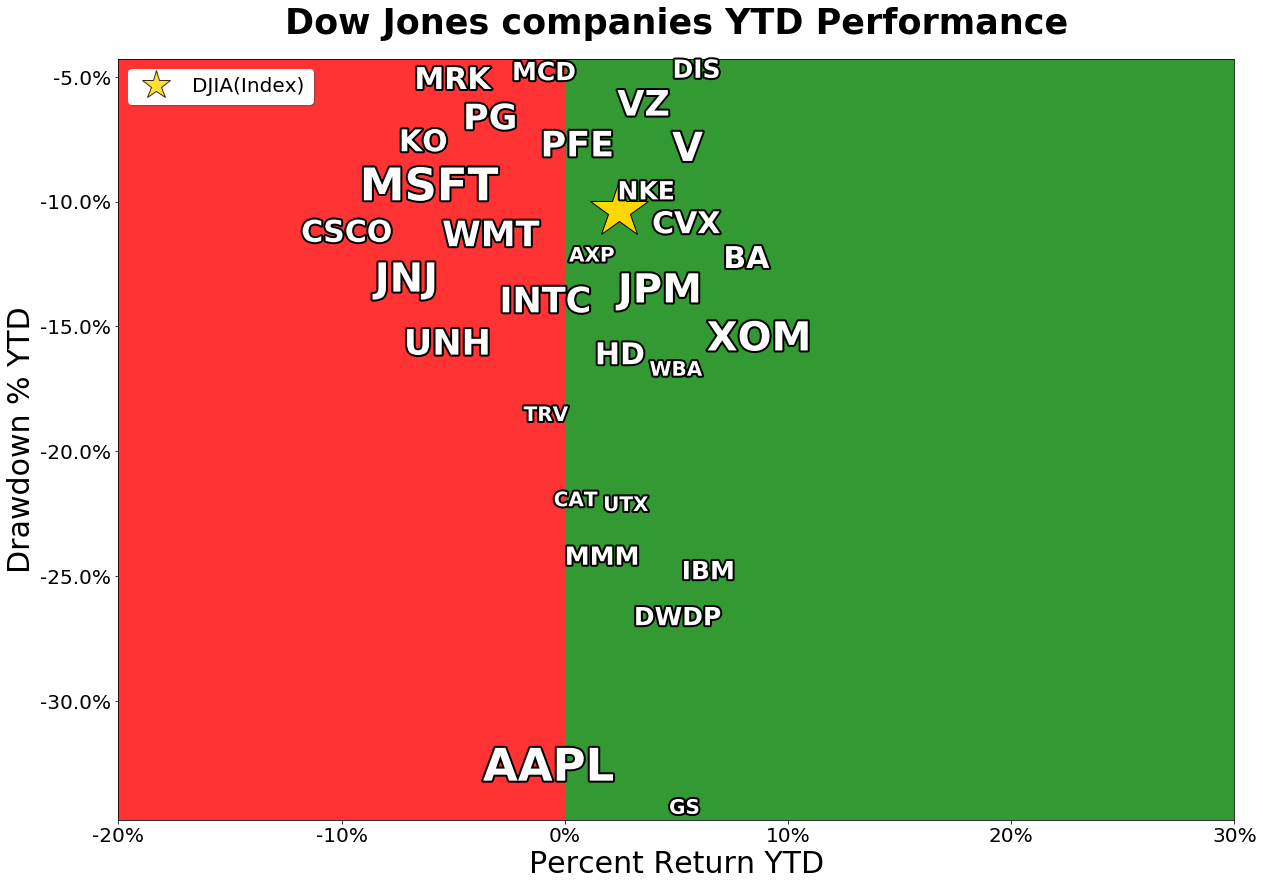

In [44]:
fig = plt.figure(figsize=(20,14))
ax = fig.add_subplot(1,1,1) 
font0 = FontProperties()
ax.margins(0)
ax.axvspan(0, 30, facecolor='green', alpha=0.8)
ax.axvspan(-20, 0, facecolor='red', alpha=0.8)
plt.plot(dia, dia_dd,marker = '*' ,markersize=60,markeredgecolor='k', color='gold', lw=3);
plt.scatter(df_test3.YTD, (df_test3.DrawdownYTD), c='w', alpha=0.7);


font = font0.copy()
font.set_style('italic')
font.set_weight('bold')
font.set_size('x-small')


text = [plt.annotate(row[0], (df_test3.YTD[index]-1, df_test3.DrawdownYTD[index]),fontsize=row[5],weight = 'semibold',
         path_effects=[pe.withStroke(linewidth=4, foreground="k")], color='w') for index, row in df_test3.iterrows()]


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.yticks(fontsize=20)
plt.xticks(color='k', fontsize=20)
plt.xlabel('Percent Return YTD', fontsize=30)
plt.ylabel('Drawdown % YTD', fontsize=30)
plt.title('Dow Jones companies YTD Performance', fontsize=35, pad=25,weight = 'semibold')


blue_line = mlines.Line2D([], [],lw=3, color='gold', marker='*',linestyle='None',
                          markeredgecolor='k',alpha=0.8, markersize=30, label='DJIA(Index)')
plt.legend(handles=[blue_line], loc=2, fontsize=20, facecolor=None,edgecolor="w", shadow=True)


adjust_text(text);


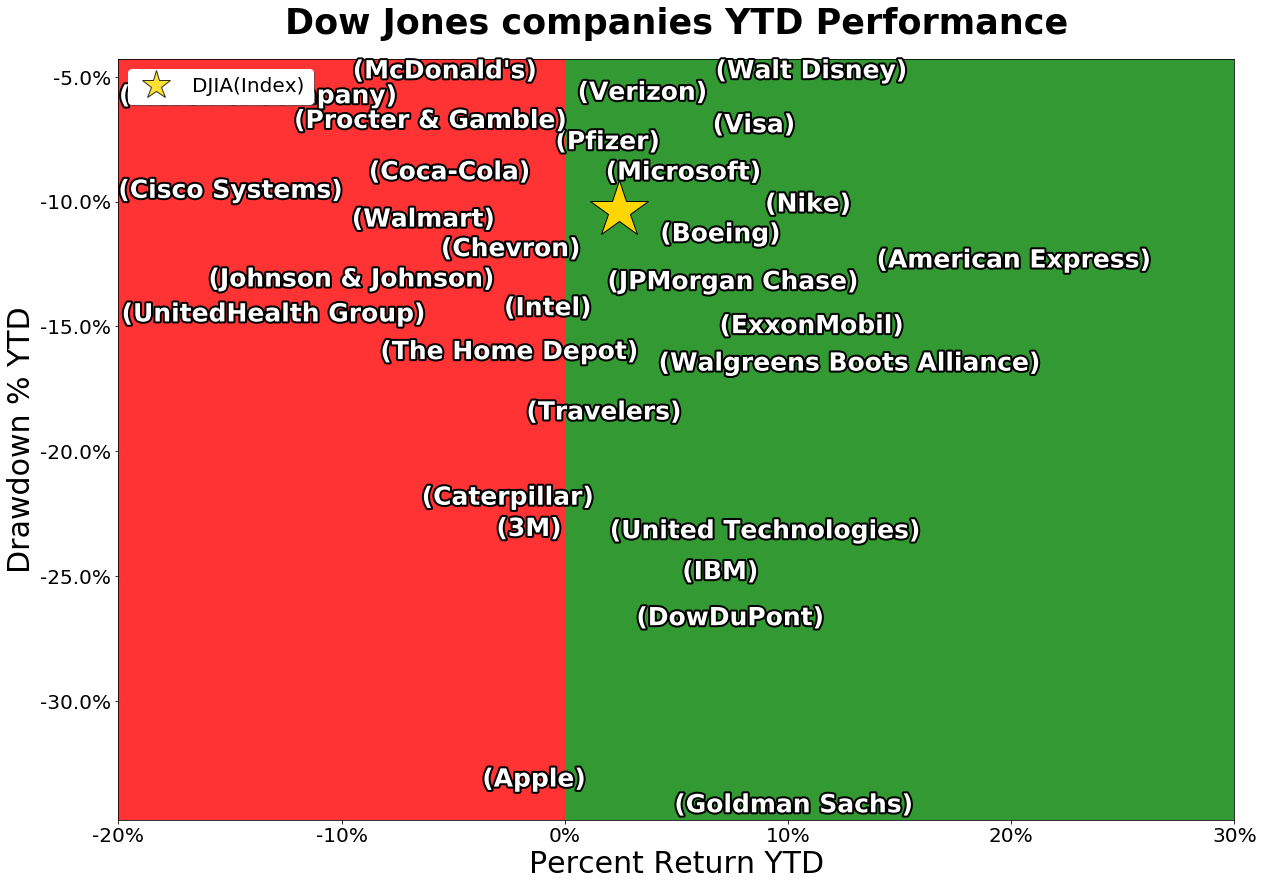

In [43]:
fig = plt.figure(figsize=(20,14))
ax = fig.add_subplot(1,1,1) 
font0 = FontProperties()
ax.margins(0)
ax.axvspan(0, 30, facecolor='green', alpha=0.8)
ax.axvspan(-20, 0, facecolor='red', alpha=0.8)
plt.plot(dia, dia_dd,marker = '*' ,markersize=60,markeredgecolor='k', color='gold', lw=3);
plt.scatter(df_test3.YTD, (df_test3.DrawdownYTD), c='w', alpha=0.7);


font = font0.copy()
font.set_style('italic')
font.set_weight('bold')
font.set_size('x-small')


text = [plt.annotate("("+mydict[row[0]]+")", (df_test3.YTD[index]-1, df_test3.DrawdownYTD[index]),fontsize=25,
        weight = 'semibold',path_effects=[pe.withStroke(linewidth=4, foreground="k")],
        color='w') for index, row in df_test3.iterrows()]

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.yticks(fontsize=20)
plt.xticks(color='k', fontsize=20)
plt.xlabel('Percent Return YTD', fontsize=30)
plt.ylabel('Drawdown % YTD', fontsize=30)
plt.title('Dow Jones companies YTD Performance', fontsize=35, pad=25,weight = 'semibold')


blue_line = mlines.Line2D([], [],lw=3, color='gold', marker='*',linestyle='None',
            markeredgecolor='k',alpha=0.8, markersize=30, label='DJIA(Index)')
plt.legend(handles=[blue_line], loc=2, fontsize=20, facecolor=None,edgecolor="w",shadow=True)

adjust_text(text);